<a href="https://colab.research.google.com/github/futureCodersSE/python-programming-for-data/blob/main/Worksheets/11_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [2]:
import pandas as pd

url = r"https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df = pd.read_csv(url)

df.head(3)

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716


In [3]:
# *  convert the `date` column to **datetime** type 
df['date'] = pd.to_datetime(df['date'])

# *  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%B')
df['day'] = df['date'].dt.day

# *  set the index to the **date** column.
df = df.set_index('date')

df = df.rename(columns={'value': 'page_views'})

df.head(3)

,page_views,year,month,day
date,,,,
2016-05-09,1201,2016,May,9
2016-05-10,2329,2016,May,10
2016-05-11,1716,2016,May,11


In [4]:
# clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df['page_views'] > df['page_views'].quantile(0.025)) & (df['page_views'] < df['page_views'].quantile(0.975))]

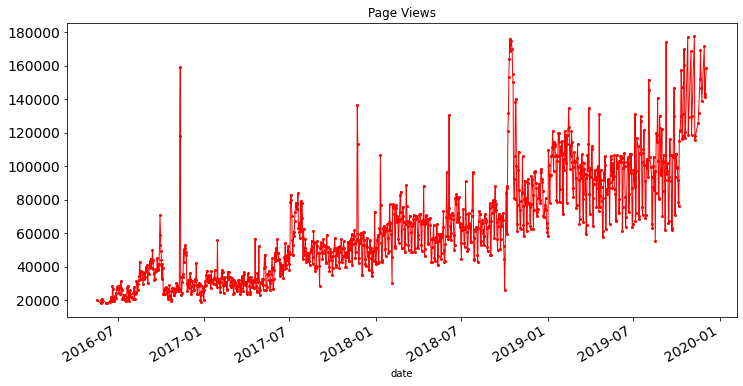

In [5]:
df['page_views'].plot(figsize=(12, 6), title='Page Views', fontsize=14, color='red', linewidth=1, marker='o', markersize=2);

###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


In [55]:
df.index.month_name().unique()

Index(['May', 'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'January', 'February', 'March', 'April'],
      dtype='object', name='date')

In [6]:
df.pivot_table(index=df.index.year, columns=df.index.month, values='page_views', aggfunc='mean')

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [7]:
df

,page_views,year,month,day
date,,,,
2016-05-19,19736,2016,May,19
2016-05-26,18060,2016,May,26
2016-05-27,19997,2016,May,27
2016-05-28,19044,2016,May,28
2016-05-29,20325,2016,May,29
...,...,...,...,...
2019-11-24,138875,2019,November,24
2019-11-29,171584,2019,November,29
2019-11-30,141161,2019,November,30


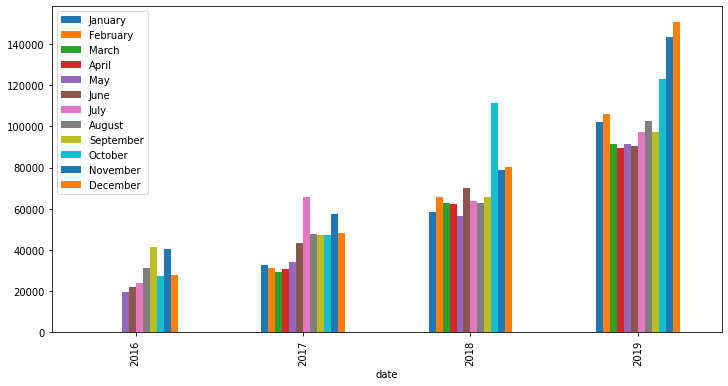

In [58]:
# show average daily page views for each month grouped by year create a pivot table, with months in order
# df_pivot = df.pivot_table(index='year', columns='month', values='page_views', aggfunc='mean')

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
df_pivot = df.pivot_table(index=df.index.year, columns=df.index.month, values='page_views', aggfunc='mean')
df_pivot.plot(kind='bar', ax=ax)
#ax = df.plot(kind='bar') # "same" as above
ax.legend(
    ['January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November','December']);

###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


<Figure size 864x432 with 0 Axes>

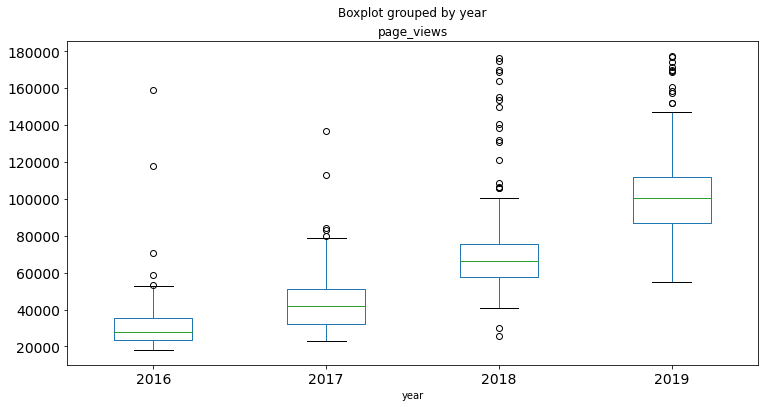

In [70]:
# create a boxplot of the page views grouped by year with standard matplot lib colors
plt.figure(figsize=(12, 6))

df.boxplot(column='page_views', by='year', figsize=(12, 6), fontsize=14, grid=False);

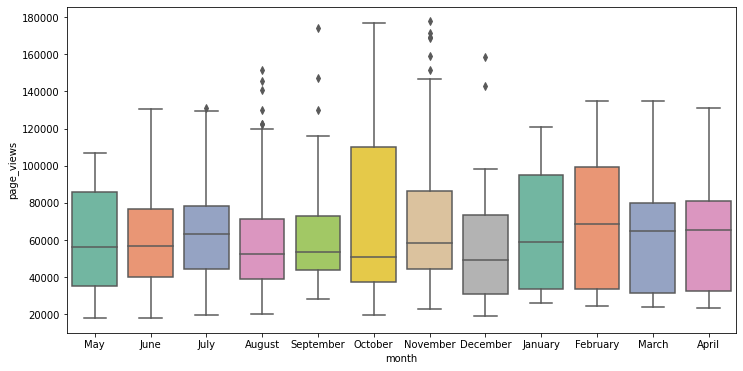

In [66]:
import seaborn as sns
# create a boxplot of the page views grouped by month 
ax = sns.boxplot(x='month', y='page_views', data=df, palette='Set2');

fig = ax.get_figure()
fig.set_size_inches(12, 6)


###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


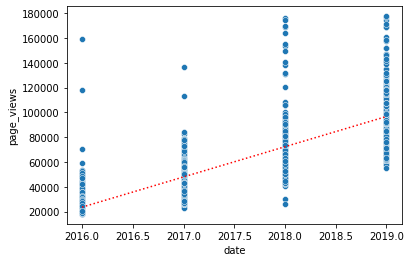

In [84]:
from scipy.stats import linregress

# create a dataframe with data up to 2019
df_2019 = df[df.index.year <= 2019]

x = df_2019.index.year
y = df_2019['page_views']


slope, intercept, r_value, p_value, std_err = linregress(x, y)
sns.scatterplot(x=x, y=y, data=df)
y_pred = intercept + slope * x
plt.plot(x, y_pred, linestyle=':', color='red')
plt.show();